In [28]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.mixture import BayesianGaussianMixture
import random

In [29]:
random.seed(50120057)

#### 시뮬레이션 데이터 생성
- 4차례 데이터를 생성하여 각 생성된 데이터가 하나의 Cluster를 이루는 것으로 가정

In [73]:
x1 = multivariate_normal.rvs([-1,-1])*0.5 + multivariate_normal.rvs([0,0],size = 100)*0.25
x2 = multivariate_normal.rvs([1,0.5])*0.75 + multivariate_normal.rvs([0,0], size = 75)*0.25 
x3 = multivariate_normal.rvs([-2,2])*0.5 + multivariate_normal.rvs([0,0], size = 50)*0.25
x4 = multivariate_normal.rvs([-1,1])*0.8 + multivariate_normal.rvs([0,0], size = 25)*0.25

X = np.concatenate([x1,x2,x3,x4])

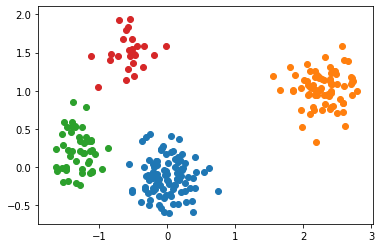

In [74]:
plt.scatter(x1[:,0], x1[:,1])
plt.scatter(x2[:,0], x2[:,1])
plt.scatter(x3[:,0], x3[:,1])
plt.scatter(x4[:,0], x4[:,1])
plt.show()

#### scikit-learn의 BayesianGaussianMixture 패키지 사용
- n_components : cluster의 수를 사전에 설정주는데 weights_ 값이 0에 가까운 경우 사용하지 않는 cluster 것으로 판단하게 된다. 유효한 cluster의 수는 n_compoents 값보다는 작은 값으로 출력될 것
- init_params : 최초 시행에서의 mean, covariance를 구하기 위한 방법 ('kmeans', 'random')
- max_iter : EM 알고리즘을 시행할 횟수
- tol : EM의 converge threshold, likelihood 개선이 tol 보다 작으면 멈추게 될 것
- weight_concentration_prior_type : dirichlet_process가 default 값이며, Stick-Breaking Process를 활용하여 값을 설정

In [90]:
DPGMM = BayesianGaussianMixture(n_components = 30,
                               init_params = 'kmeans',
                               max_iter = 1000000,
                               tol = 1e-8,
                               n_init = 10,
                               weight_concentration_prior_type = 'dirichlet_process',
                               random_state = 50120057)

In [91]:
DPGMM.fit(X)

BayesianGaussianMixture(max_iter=1000000, n_components=30, n_init=10,
                        random_state=50120057, tol=1e-08)

- weights 값이 유의미하게 큰 것만 cluster가 할당된 것으로 간주한다. 

In [92]:
n_clusters = (np.round(DPGMM.weights_,2) > 0).sum()
print('Optimal number of clusters : ' +str(n_clusters))

Optimal number of clusters : 4


In [93]:
y_pred = DPGMM.predict(X)

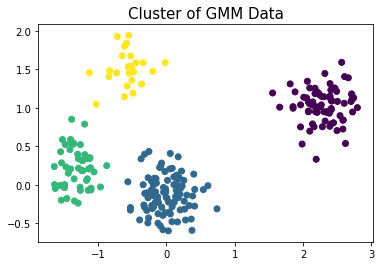

In [94]:
plt.scatter(X[:,0], X[:,1], c = y_pred)
plt.title("Cluster of GMM Data", fontsize = 15)
plt.show()

- 유효한 Cluster로 판단되는 경우, 해당 Cluster의 mean 값을 출력

In [109]:
np.round(DPGMM.means_[np.where(np.round(DPGMM.weights_,2) > 0),:],2)

array([[[ 2.27,  1.02],
        [ 0.  , -0.13],
        [-1.26,  0.22],
        [-0.54,  1.46]]])